In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("iris_classification/datasets/data_with_nans.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     170 non-null    int64  
 1   Id             170 non-null    int64  
 2   SepalLengthCm  167 non-null    float64
 3   SepalWidthCm   169 non-null    float64
 4   PetalLengthCm  166 non-null    float64
 5   PetalWidthCm   168 non-null    float64
 6   Species        170 non-null    object 
dtypes: float64(4), int64(2), object(1)
memory usage: 9.4+ KB


# Reducing unnecessary columns

In [4]:
data.columns

Index(['Unnamed: 0', 'Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm',
       'PetalWidthCm', 'Species'],
      dtype='object')

In [5]:
data.drop('Unnamed: 0', axis=1, inplace=True)
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,0,5.1,3.5,1.4,0.2,Iris-setosa
1,1,4.7,3.2,1.6,0.2,Iris-setosa
2,2,4.9,3.1,1.5,0.1,Iris-setosa
3,3,4.4,2.9,1.4,0.2,Iris-setosa
4,4,5.0,3.4,1.5,0.2,Iris-setosa
...,...,...,...,...,...,...
165,165,5.7,2.5,5.0,2.0,Iris-virginica
166,166,6.8,3.0,5.5,2.1,Iris-virginica
167,167,6.4,2.7,5.3,1.9,Iris-virginica
168,168,7.2,3.6,6.1,2.5,Iris-virginica


In [6]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,170.000000,167.000000,169.000000,166.000000,168.000000
mean,84.500000,5.826347,3.072781,3.707229,1.180357
std,49.218899,0.827189,0.447578,1.789382,0.765049
min,0.000000,4.300000,2.000000,1.000000,0.100000
25%,42.250000,5.100000,2.800000,1.500000,0.300000
50%,84.500000,5.800000,3.000000,4.300000,1.300000
75%,126.750000,6.400000,3.400000,5.100000,1.800000
max,169.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
data.groupby('Species').agg(['min', 'max', 'std', 'mean'])

Id                        SepalLengthCm                 \
                 min  max        std   mean           min  max       std   
Species                                                                    
Iris-setosa        0   59  17.464249   29.5           4.3  6.9  0.429014   
Iris-versicolor   60  113  15.732133   86.5           4.9  7.0  0.516189   
Iris-virginica   114  169  16.309506  141.5           4.9  7.9  0.650025   

                          SepalWidthCm                          PetalLengthCm  \
                     mean          min  max       std      mean           min   
Species                                                                         
Iris-setosa      5.034483          2.3  4.4  0.390709  3.389831           1.0   
Iris-versicolor  5.932075          2.0  4.4  0.382355  2.805556           1.5   
Iris-virginica   6.546429          2.2  3.9  0.355203  2.996429           1.3   

                                         PetalWidthCm                           
                 max       std      mean          min  max       std      mean  
Species                                                                         
Iris-setosa      5.4  0.639570  1.572414          0.1  2.1  0.295950  0.300000  
Iris-versicolor  5.1  0.623167  4.190385          0.4  1.8  0.235049  1.314815  
Iris-virginica   6.9  0.795195  5.469643          0.4  2.5  0.353215  1.992727

In [8]:
data.isna().sum()

Id               0
SepalLengthCm    3
SepalWidthCm     1
PetalLengthCm    4
PetalWidthCm     2
Species          0
dtype: int64

In [9]:
for column in data.columns[1:-1]:
    data[column].fillna(data[column].mean(), inplace = True)

In [10]:
data.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# Data Visualization

In [11]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,0,5.1,3.5,1.4,0.2,Iris-setosa
1,1,4.7,3.2,1.6,0.2,Iris-setosa
2,2,4.9,3.1,1.5,0.1,Iris-setosa
3,3,4.4,2.9,1.4,0.2,Iris-setosa
4,4,5.0,3.4,1.5,0.2,Iris-setosa


<AxesSubplot: >

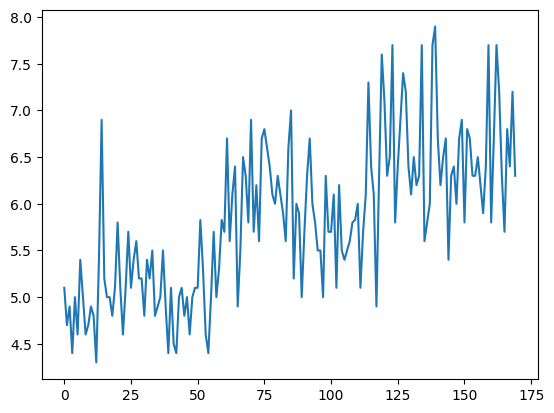

In [12]:
data['SepalLengthCm'].plot()

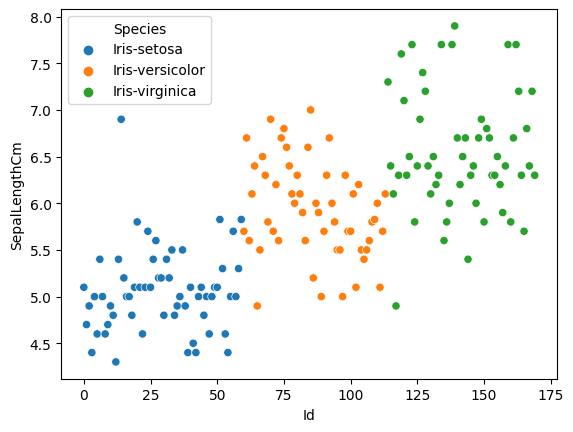

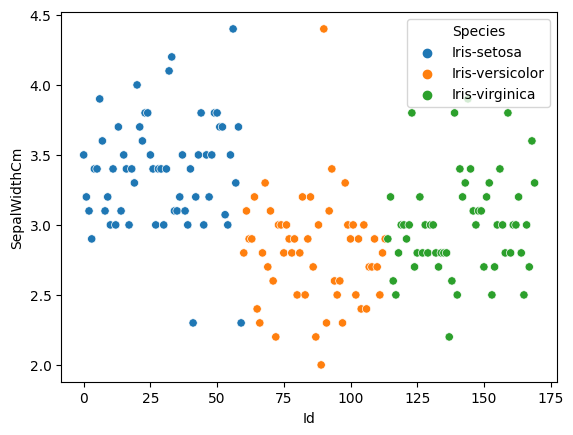

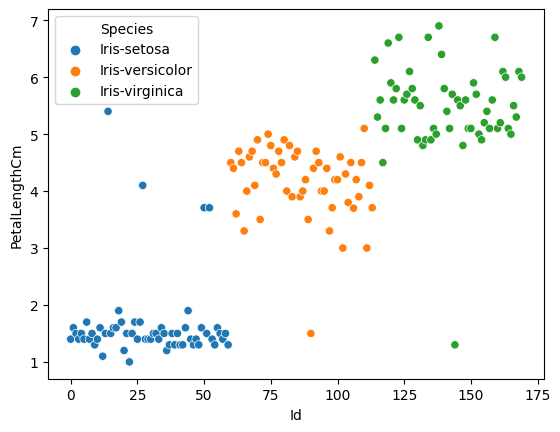

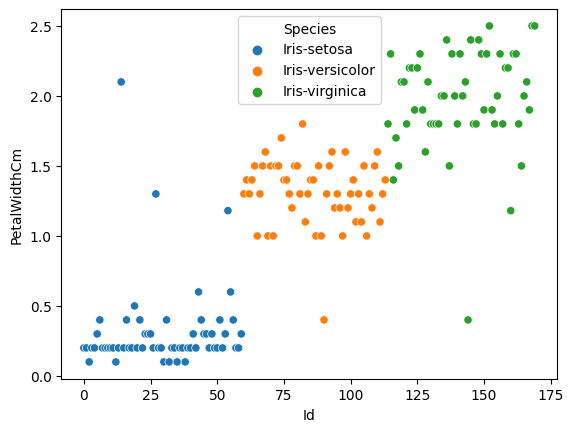

In [13]:
for col in data.columns[1: -1]:
    sns.scatterplot(data=data, x='Id', y=col, hue='Species')
    plt.show()

# Outlier Detection

### 3 Standard Variation

In [14]:
sel_spec = data[data['Species'] == 'Iris-setosa']

In [15]:
sel_col = sel_spec['SepalLengthCm']
sel_col

0     5.100000
1     4.700000
2     4.900000
3     4.400000
4     5.000000
5     4.600000
6     5.400000
7     5.000000
8     4.600000
9     4.700000
10    4.900000
11    4.800000
12    4.300000
13    5.400000
14    6.900000
15    5.200000
16    5.000000
17    5.000000
18    4.800000
19    5.100000
20    5.800000
21    5.100000
22    4.600000
23    5.100000
24    5.700000
25    5.100000
26    5.400000
27    5.600000
28    5.200000
29    5.200000
30    4.800000
31    5.400000
32    5.200000
33    5.500000
34    4.800000
35    4.900000
36    5.000000
37    5.500000
38    4.900000
39    4.400000
40    5.100000
41    4.500000
42    4.400000
43    5.000000
44    5.100000
45    4.800000
46    5.000000
47    4.600000
48    5.000000
49    5.100000
50    5.100000
51    5.826347
52    5.300000
53    4.600000
54    4.400000
55    5.000000
56    5.700000
57    5.000000
58    5.300000
59    5.826347
Name: SepalLengthCm, dtype: float64

In [16]:
sel_std = sel_col.std()
sel_std

0.44537795996732205

In [17]:
sel_avg = sel_col.mean()
sel_avg

5.060878243512974

In [18]:
sigma_plus = sel_avg + (3 * sel_std)
sigma_plus

6.397012123414941

In [19]:
sigma_minus = sel_avg - (3 * sel_std)
sigma_minus

3.724744363611008

In [20]:
sel_col[(sel_spec['SepalLengthCm'] > sigma_plus) | (sel_spec['SepalLengthCm'] < sigma_minus)].index

Int64Index([14], dtype='int64')

In [21]:
for col in data.columns[1:-1]:
    for spec in data['Species'].unique():
        sel_spec = data[data['Species'] == spec]
        sel_col = sel_spec[col]
        
        sel_std = sel_col.std()
        sel_avg = sel_col.mean()
        sigma_plus = sel_avg + (3 * sel_std)
        sigma_minus = sel_avg - (3 * sel_std)
        
        outlier = sel_col[(sel_spec[col] > sigma_plus) | (sel_spec[col] < sigma_minus)].index
        
        data.drop(index=outlier, inplace=True)
        
        print(col, spec, outlier)

SepalLengthCm Iris-setosa Int64Index([14], dtype='int64')
SepalLengthCm Iris-versicolor Int64Index([], dtype='int64')
SepalLengthCm Iris-virginica Int64Index([], dtype='int64')
SepalWidthCm Iris-setosa Int64Index([], dtype='int64')
SepalWidthCm Iris-versicolor Int64Index([90], dtype='int64')
SepalWidthCm Iris-virginica Int64Index([], dtype='int64')
PetalLengthCm Iris-setosa Int64Index([27, 50, 52], dtype='int64')
PetalLengthCm Iris-versicolor Int64Index([], dtype='int64')
PetalLengthCm Iris-virginica Int64Index([144], dtype='int64')
PetalWidthCm Iris-setosa Int64Index([54], dtype='int64')
PetalWidthCm Iris-versicolor Int64Index([], dtype='int64')
PetalWidthCm Iris-virginica Int64Index([], dtype='int64')


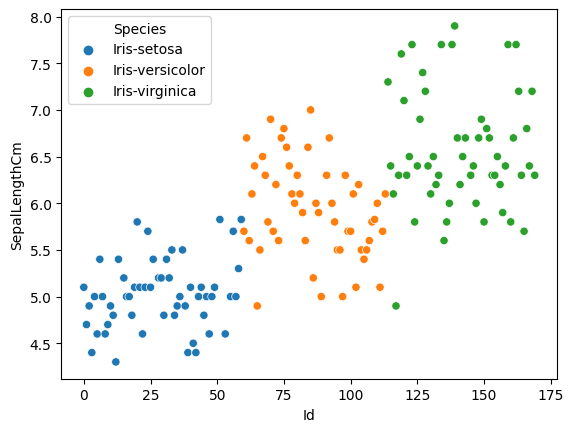

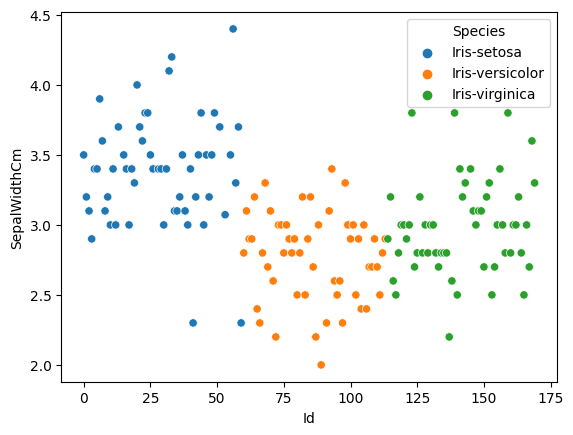

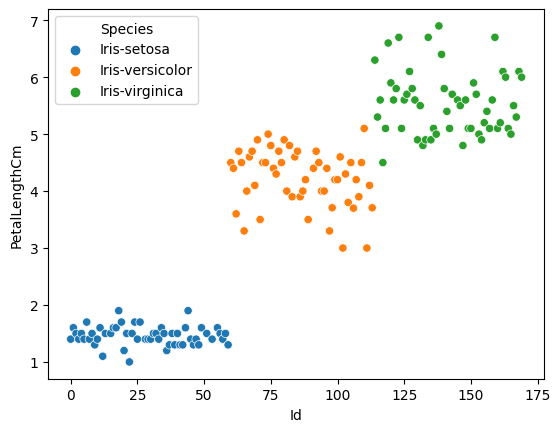

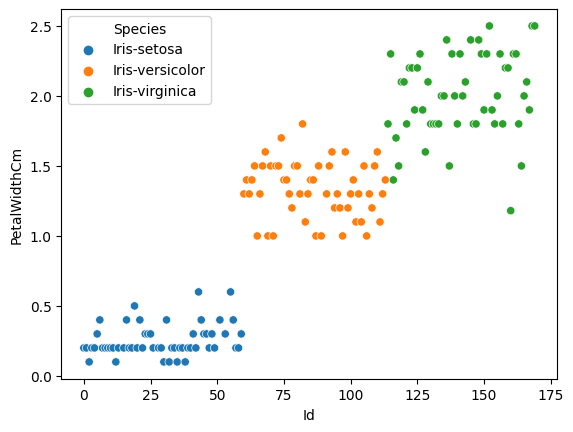

In [22]:
for col in data.columns[1: -1]:
    sns.scatterplot(data=data, x='Id', y=col, hue='Species')
    plt.show()

### IQR - Quantile

In [31]:
for col in data.columns[1: -1]:
    for spec in data['Species'].unique():
        sel_spec = data[data['Species'] == spec]
        sel_col = sel_spec[col]
        
        q1 = sel_col.quantile(0.25)
        q3 = sel_col.quantile(0.75)
        
        iqr = q3 - q1
        
        minimum = q1 - (1.5 * iqr)
        maximum = q3 + (1.5 * iqr)
        
        print(col, spec, " |min = ", minimum, " |max = ", maximum)
        
        max_idxs = data[(data['Species'] == spec) & (data[col] > maximum)].index
        print(max_idxs)
        
        min_idxs = data[(data['Species'] == spec) & (data[col] < minimum)].index
        print(min_idxs)
        
        data.drop(index=max_idxs, inplace=True)
        data.drop(index=min_idxs, inplace=True)

SepalLengthCm Iris-setosa  |min =  4.199999999999999  |max =  5.800000000000001
Int64Index([51, 59], dtype='int64')
Int64Index([], dtype='int64')
SepalLengthCm Iris-versicolor  |min =  4.549999999999999  |max =  7.35
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
SepalLengthCm Iris-virginica  |min =  5.15  |max =  7.950000000000001
Int64Index([], dtype='int64')
Int64Index([117], dtype='int64')
SepalWidthCm Iris-setosa  |min =  2.35  |max =  4.35
Int64Index([56], dtype='int64')
Int64Index([41], dtype='int64')
SepalWidthCm Iris-versicolor  |min =  1.75  |max =  3.75
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
SepalWidthCm Iris-virginica  |min =  2.1999999999999993  |max =  3.8000000000000007
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
PetalLengthCm Iris-setosa  |min =  1.0999999999999996  |max =  1.9000000000000004
Int64Index([], dtype='int64')
Int64Index([22], dtype='int64')
PetalLengthCm Iris-versicolor  |min =  2.8500000000000005  |max =  5

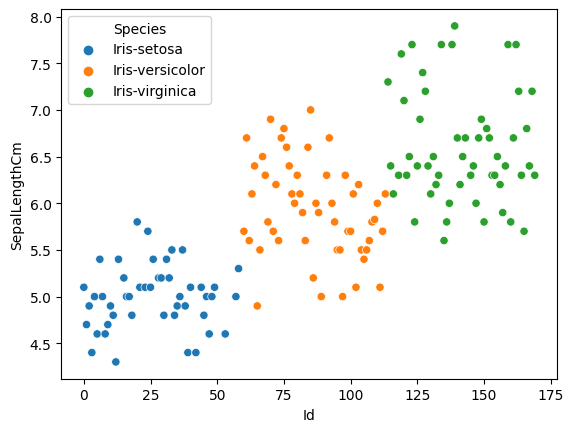

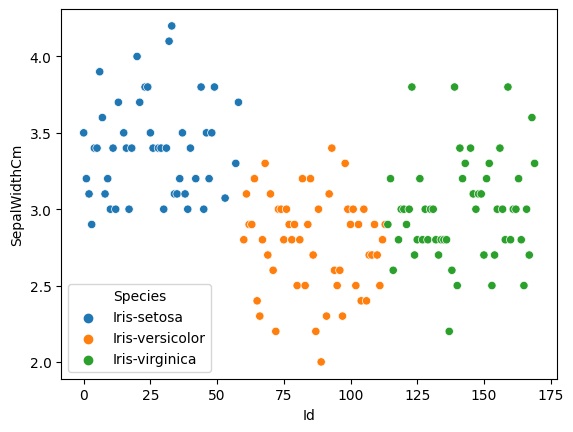

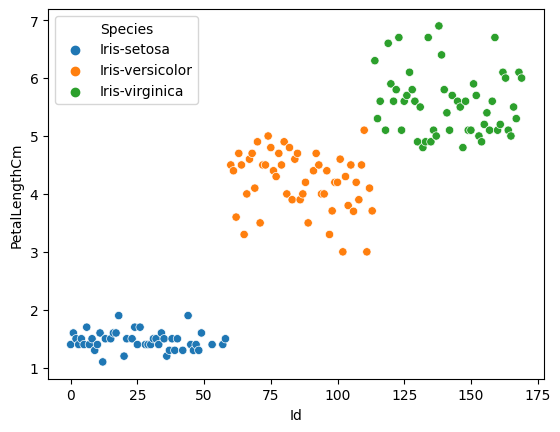

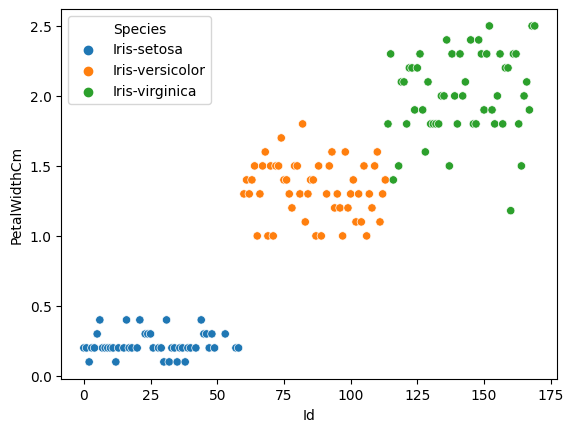

In [32]:
for col in data.columns[1: -1]:
    sns.scatterplot(data=data, x='Id', y=col, hue='Species')
    plt.show()

In [33]:
data.to_csv('iris_classification/final_data.csv')